# Car Data Selling Price Prediction

### Data Definition
* Car_Name - This column should be filled with the name of the car.
* Year - This column should be filled with the year in which the car was bought.
* Selling_Price - This column should be filled with the price the owner wants to sell the car at.
* Present_Price - This is the current ex-showroom price of the car.
* Kms_Driven - This is the distance completed by the car in km.
* Fuel_Type - Fuel type of the car.
* Seller_Type - Defines whether the seller is a dealer or an individual.
* Transmission - Defines whether the car is manual or automatic.
* Owner - Defines the number of owners the car has previously had.

In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
#warnings.filterwarnings("ignore") # only use this if warnings ares till being displayed

In [2]:
import pandas as pd
import seaborn as sns

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
car_data_df = pd.read_csv(r'./data/car data.csv')
#car_details_df = pd.read_csv(r'./data/CAR DETAILS FROM CAR DEKHO.csv')
#car_details_v3_df = pd.read_csv(r'./data/Car details v3.csv')

In [5]:
car_data_df.sample(5)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
115,Royal Enfield Classic 350,2015,1.11,1.47,17500,Petrol,Individual,Manual,0
238,verna,2013,4.80,9.40,60241,Petrol,Dealer,Manual,0
215,verna,2012,4.50,9.40,36100,Petrol,Dealer,Manual,0
282,city,2014,8.25,14.00,63000,Diesel,Dealer,Manual,0
217,eon,2016,3.15,4.43,15000,Petrol,Dealer,Manual,0


In [6]:
car_data_df.shape

(301, 9)

In [7]:
car_data_df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

In [8]:
car_data_df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [9]:
car_data_df.describe(include='object')

,Car_Name,Fuel_Type,Seller_Type,Transmission
count,301,301,301,301
unique,98,3,2,2
top,city,Petrol,Dealer,Manual
freq,26,239,195,261


In [10]:
car_data_df.describe(include='all')

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
count,301,301.000000,301.000000,301.000000,301.000000,301,301,301,301.000000
unique,98,NaN,NaN,NaN,NaN,3,2,2,NaN
top,city,NaN,NaN,NaN,NaN,Petrol,Dealer,Manual,NaN
freq,26,NaN,NaN,NaN,NaN,239,195,261,NaN
mean,NaN,2013.627907,4.661296,7.628472,36947.205980,NaN,NaN,NaN,0.043189
std,NaN,2.891554,5.082812,8.644115,38886.883882,NaN,NaN,NaN,0.247915
min,NaN,2003.000000,0.100000,0.320000,500.000000,NaN,NaN,NaN,0.000000
25%,NaN,2012.000000,0.900000,1.200000,15000.000000,NaN,NaN,NaN,0.000000
50%,NaN,2014.000000,3.600000,6.400000,32000.000000,NaN,NaN,NaN,0.000000
75%,NaN,2016.000000,6.000000,9.900000,48767.000000,NaN,NaN,NaN,0.000000


In [11]:
for col in car_data_df.columns:
    unique_values = car_data_df[col].unique()
    unique_count = len(unique_values)
    if unique_count <= 10:
        print('{} has {} unique values: {}'.format(col, unique_count, unique_values))
    else:
        print('{} has {} unique values'.format(col, unique_count))

Car_Name has 98 unique values
Year has 16 unique values
Selling_Price has 156 unique values
Present_Price has 147 unique values
Kms_Driven has 206 unique values
Fuel_Type has 3 unique values: ['Petrol' 'Diesel' 'CNG']
Seller_Type has 2 unique values: ['Dealer' 'Individual']
Transmission has 2 unique values: ['Manual' 'Automatic']
Owner has 3 unique values: [0 1 3]


In [12]:
car_data_df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [13]:
final_data_set = car_data_df[['Year', 'Selling_Price', 'Present_Price', 'Kms_Driven', 'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner']]

In [14]:
final_data_set['car_age'] = pd.datetime.now().year - final_data_set['Year']

In [15]:
final_data_set.drop(['Year'], axis=1, inplace=True)

In [16]:
final_data_set.sample(5)

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,car_age
18,3.25,5.09,35500,CNG,Dealer,Manual,0,6
130,0.75,0.87,11000,Petrol,Individual,Manual,0,4
268,4.80,5.80,19000,Petrol,Dealer,Manual,0,4
111,1.15,1.50,8700,Petrol,Individual,Manual,0,5
224,5.11,9.40,36198,Petrol,Dealer,Automatic,0,8


In [17]:
# One-hot encoding
final_data_set = pd.get_dummies(final_data_set, drop_first=True)

In [18]:
final_data_set.sample(5)

,Selling_Price,Present_Price,Kms_Driven,Owner,car_age,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
201,3.25,6.79,58000,1,11,1,0,0,1
188,0.25,0.57,18000,0,8,0,1,1,1
279,6.25,13.60,40126,0,7,0,1,0,1
107,1.25,1.50,15000,0,8,0,1,1,1
176,0.35,1.05,30000,0,10,0,1,1,1


In [19]:
final_data_set.corr()

,Selling_Price,Present_Price,Kms_Driven,Owner,car_age,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
Selling_Price,1.000000,0.878983,0.029187,-0.088344,-0.236141,0.552339,-0.540571,-0.550724,-0.367128
Present_Price,0.878983,1.000000,0.203647,0.008057,0.047584,0.473306,-0.465244,-0.512030,-0.348715
Kms_Driven,0.029187,0.203647,1.000000,0.089216,0.524342,0.172515,-0.172874,-0.101419,-0.162510
Owner,-0.088344,0.008057,0.089216,1.000000,0.182104,-0.053469,0.055687,0.124269,-0.050316
car_age,-0.236141,0.047584,0.524342,0.182104,1.000000,-0.064315,0.059959,0.039896,-0.000394
Fuel_Type_Diesel,0.552339,0.473306,0.172515,-0.053469,-0.064315,1.000000,-0.979648,-0.350467,-0.098643
Fuel_Type_Petrol,-0.540571,-0.465244,-0.172874,0.055687,0.059959,-0.979648,1.000000,0.358321,0.091013
Seller_Type_Individual,-0.550724,-0.512030,-0.101419,0.124269,0.039896,-0.350467,0.358321,1.000000,0.063240
Transmission_Manual,-0.367128,-0.348715,-0.162510,-0.050316,-0.000394,-0.098643,0.091013,0.063240,1.000000


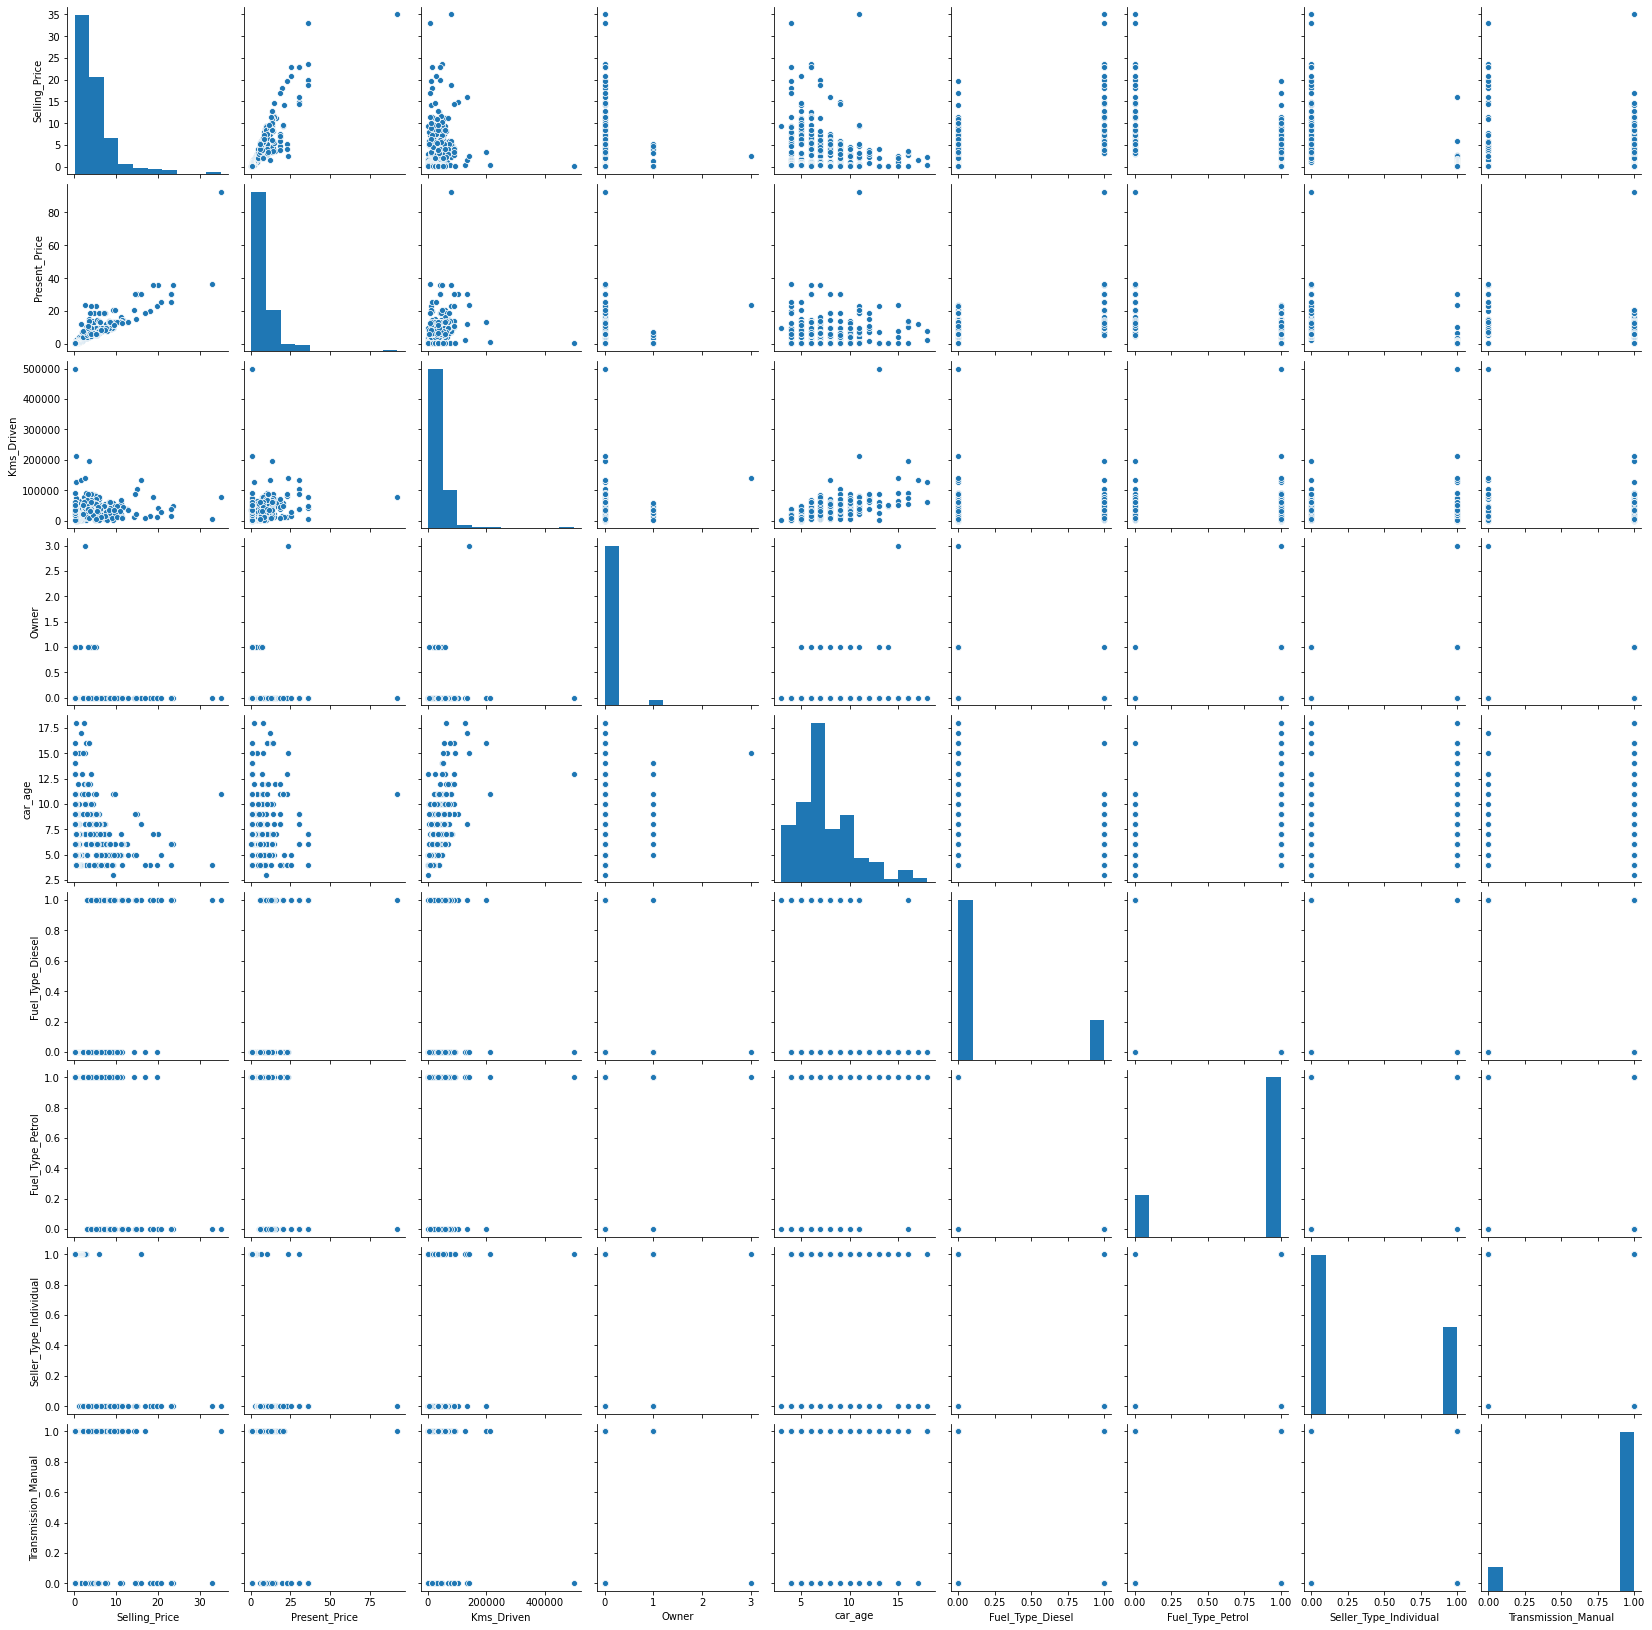

In [20]:
sns.pairplot(final_data_set)

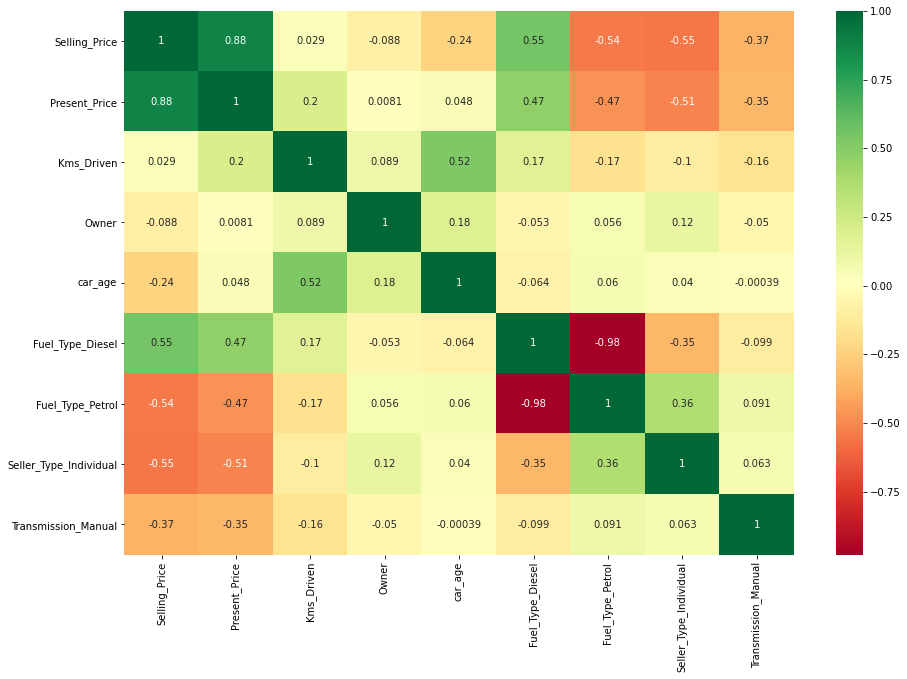

In [21]:
corrmat = final_data_set.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(15,10))

# plot a heat map
g = sns.heatmap(final_data_set[top_corr_features].corr(), annot=True, cmap='RdYlGn')

In [22]:
# dependent and independent features
x = final_data_set.iloc[:,1:]
y = final_data_set.iloc[:,0]

In [23]:
# Feature Importance
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
model.fit(x,y)

ExtraTreesRegressor()

In [24]:
print(model.feature_importances_)

[0.34824908 0.041244   0.00039362 0.0746834  0.24282665 0.00787844
 0.13533926 0.14938555]


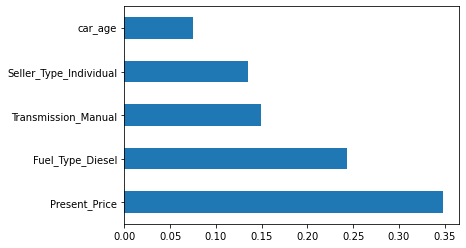

In [25]:
# plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=x.columns)
feat_importances.nlargest(5).plot(kind='barh')
plt.show()

In [26]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [27]:
from sklearn.ensemble import RandomForestRegressor
rf_random = RandomForestRegressor()

In [28]:
### Hyper-params
import numpy as np

# no. of trees
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]

# no. of features to consider at every split
max_features = ['auto', 'sqrt']

# max number of levels in the tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]

# min no. of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]

# min no. f samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [29]:
from sklearn.model_selection import RandomizedSearchCV

In [30]:
# create random grid

random_grid = {'n_estimators': n_estimators, 
              'max_features': max_features,
              'max_depth': max_depth,
              'min_samples_split': min_samples_split,
              'min_samples_leaf': min_samples_leaf}

print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [31]:
rf = RandomForestRegressor()
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, scoring = 'neg_mean_squared_error', n_iter = 10, cv = 5, verbose = 2, random_state = 42, n_jobs = 1)

In [32]:
rf_random.fit(x_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   1.0s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.9s remaining:    0.0s


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   1.2s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   0.9s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   1.1s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   1.0s
[CV] n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15 
[CV]  n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15, total=   1.2s
[CV] n_estimators=1100, min_samples_split=10, mi

[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   3.0s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   2.0s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   4.4s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   2.9s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   1.7s
[CV] n_estimators=700, min_samples_split=15, min_sam

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  1.0min finished


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [33]:
predictions = rf_random.predict(x_test)

In [34]:
predictions

array([ 3.39677,  6.7862 ,  0.74799,  0.67111,  4.4511 ,  3.78346,
        0.35475,  9.02624,  3.12963,  5.22204,  0.53939,  0.39313,
        9.08031,  1.03174,  1.11015,  9.50936,  0.33816,  1.37294,
        3.76341, 21.14995,  8.19038,  4.52497,  9.63894,  1.07058,
        2.7656 ,  3.64426,  3.6766 ,  9.23948,  4.3187 ,  8.75119,
        0.28542,  0.51709,  3.39957,  7.43858,  0.53676,  5.91633,
        7.19822,  0.7175 ,  4.93427,  5.21179,  5.45515,  0.43048,
        0.466  ,  6.56239,  7.51824,  2.26533,  3.8456 ,  7.3938 ,
        0.83787,  7.30625,  2.83558,  4.98685,  2.70138, 10.81562,
        0.52457,  5.60633, 17.831  ,  0.76959,  0.70362,  5.05164,
        7.07151])

In [35]:
errors = y_test - predictions

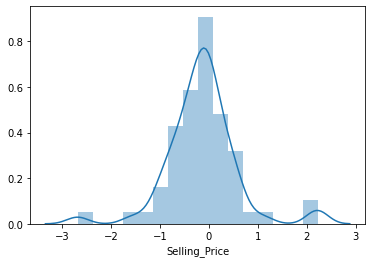

In [36]:
sns.distplot(errors)

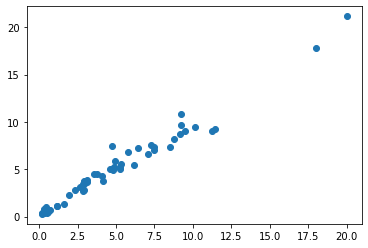

In [39]:
plt.scatter(y_test, predictions)

In [40]:
confusion_matrix_data = {'y_test': y_test, 'predictions': predictions, 'variance': errors}
#print(confusion_matrix_data)
confusion_matrix_df = pd.DataFrame(confusion_matrix_data)
confusion_matrix_df.sample(5)

,y_test,predictions,variance
257,8.50,7.39380,1.10620
260,9.15,8.75119,0.39881
21,4.90,5.21179,-0.31179
16,7.25,7.51824,-0.26824
174,0.38,0.46600,-0.08600


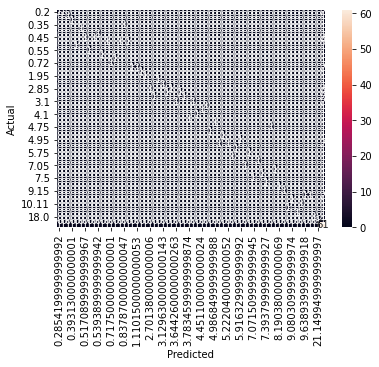

In [41]:
# confusion matrix using pandas, deosn't look like what I want

confusion_matrix = pd.crosstab(y_test, predictions, rownames=['Actual'], colnames=['Predicted'], margins=True)
sns.heatmap(confusion_matrix, annot=True)
plt.show()

In [42]:
# confusion matrix using sklearn.metrics
from sklearn.metrics import confusion_matrix
try:
    confusion_matrix(y_test, predictions)
except ValueError as e:
    print(e)

continuous is not supported


In [43]:
# since sklearn.metrics seem not to work, let me do manual

# 1. Mean Absolute Error
abs_errors = abs(errors)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'lakhs.')

# 2. Mean Average Percentage Error (mape)
mape = 100 * (abs_errors / y_test)
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Mean Absolute Error: -0.14 lakhs.
Accuracy: 79.92 %.


In [44]:
import pickle

# open a file where you want to store the data
file = open('random_forest_regression_model.pkl', 'wb')

# dump the info to the file
pickle.dump(rf_random, file)